#### Preprocess the Apache-JIT dataset.

#### Import necessary libraries.

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


#### Load the dataset.

In [2]:

df = None

dtypes = {"commit_id": "str", "project" : "str", "buggy" : "str", "fix" : "str", "year" : "str", "author_date" : "str",
          "la" : "int16", "ld" : "int16", "nf" : "int16", "nd" : "int16", "ns" : "int16", "ent" : "float64",
          "ndev" : "float64", "age" : "float64", "nuc" : "float64", "aexp" : "int16", "arexp" : "float64", "asexp" : "float64"}

try:
    print("\nStart loading CSV file...")
    df = pd.read_csv("../dataset/java/apachejit_total.csv", sep = ",", dtype = dtypes)
    print("\nFinish loading CSV file...")
except Exception as e:
    print("\nFail to load CSV file.")
    print("Error: {}".format(e))



Start loading CSV file...

Finish loading CSV file...


#### Display dataset size.

In [3]:

df.shape


(106674, 18)

#### Display dataset data types.

In [4]:

df.dtypes


commit_id       object
project         object
buggy           object
fix             object
year            object
author_date     object
la               int16
ld               int16
nf               int16
nd               int16
ns               int16
ent            float64
ndev           float64
age            float64
nuc            float64
aexp             int16
arexp          float64
asexp          float64
dtype: object

#### Display the first rows of the dataset.

In [5]:

pd.set_option("display.precision", 16)
df.head()


,commit_id,project,buggy,fix,year,author_date,la,ld,nf,nd,ns,ent,ndev,age,nuc,aexp,arexp,asexp
0,7b8480744ea6e6fb41efd4329bb470c8f3c763db,apache/groovy,False,False,2003,1070355653,372,23,8,3,3,2.6697429443897702,0.250000000000000,3.6250000000000000,2.125,243,243.0,0.6835848225897260
1,192b631e7be302ecde822546ba70a9853ddbda01,apache/groovy,False,False,2003,1063298262,2,2,2,2,1,1.0000000000000000,1.000000000000000,0.0000000000000000,2.500,19,19.0,14.0000000000000000
2,0ab6465a7dece117c61c3efd3ec95d20524bdad6,apache/groovy,False,False,2003,1069704572,41,26,3,3,2,1.2376124957990802,0.666666666666667,5.3333333333333304,45.000,233,233.0,0.0006060572641253
3,449241d5fa1aeadd5eb9fa1280d4104dc0dfb891,apache/groovy,False,False,2003,1068487625,8,6,2,1,1,0.5916727785823270,1.000000000000000,3.0000000000000000,35.500,64,64.0,55.0000000000000000
4,698df9f5b0816e05bbf97a390428f8ef94e0cdbf,apache/groovy,False,False,2003,1063313516,70,4,6,3,1,2.5196719979484601,0.333333333333333,0.0000000000000000,6.000,27,27.0,22.0000000000000000


#### Display dataset statistics.

In [6]:

df = df.drop(columns = ["commit_id", "project", "fix", "year", "author_date"])
le = LabelEncoder()
df["buggy"] = le.fit_transform(df["buggy"])
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()


,buggy,la,ld,nf,nd,ns,ent,ndev,age,nuc,aexp,arexp,asexp
count,106674.000,106674.000,106674.000,106674.000,106674.000,106674.000,106674.000,106674.000,106674.000,106674.000,106674.000,106674.000,106674.000
mean,0.265,189.132,76.731,6.356,2.943,1.421,1.304,5.232,60.327,90.907,1225.425,606.947,402.826
std,0.441,533.158,312.677,10.142,3.418,0.975,1.243,9.107,136.148,251.274,2704.083,1010.401,991.486
min,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,7.000,2.000,1.000,1.000,1.000,0.000,1.000,1.333,5.000,49.000,44.500,1.000
50%,0.000,37.000,9.000,3.000,2.000,1.000,1.000,2.333,13.818,15.000,222.000,180.333,36.000
75%,1.000,147.000,41.000,7.000,3.000,2.000,2.050,5.875,57.000,51.000,829.000,609.858,267.000
max,1.000,9967.000,9950.000,100.000,89.000,45.000,6.570,167.500,2713.057,3704.500,15795.000,4841.250,7842.000


#### Check for missing data.

In [7]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106674 entries, 0 to 106673
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   buggy   106674 non-null  int32  
 1   la      106674 non-null  int16  
 2   ld      106674 non-null  int16  
 3   nf      106674 non-null  int16  
 4   nd      106674 non-null  int16  
 5   ns      106674 non-null  int16  
 6   ent     106674 non-null  float64
 7   ndev    106674 non-null  float64
 8   age     106674 non-null  float64
 9   nuc     106674 non-null  float64
 10  aexp    106674 non-null  int16  
 11  arexp   106674 non-null  float64
 12  asexp   106674 non-null  float64
dtypes: float64(6), int16(6), int32(1)
memory usage: 6.5 MB



#### Check for skewness.


In [8]:

df.skew()


buggy    1.067
la       7.771
ld      12.889
nf       4.131
nd       4.678
ns       6.145
ent      0.927
ndev     5.799
age      5.655
nuc      5.598
aexp     3.321
arexp    2.346
asexp    3.931
dtype: float64

#### Check for kurtosis.

In [9]:

df.kurtosis()


buggy    -0.862
la       85.041
ld      242.531
nf       22.250
nd       40.717
ns      101.698
ent       0.420
ndev     54.502
age      48.564
nuc      40.489
aexp     11.136
arexp     4.738
asexp    17.330
dtype: float64

#### Generate the correlation matrix between the features.

In [10]:

correlation_matrix = df.corr(numeric_only = True)
print(correlation_matrix)


       buggy     la     ld     nf     nd     ns    ent   ndev    age    nuc  \
buggy  1.000  0.247  0.114  0.256  0.236  0.220  0.286 -0.055 -0.050  0.038   
la     0.247  1.000  0.295  0.517  0.379  0.235  0.404 -0.107 -0.034 -0.060   
ld     0.114  0.295  1.000  0.425  0.299  0.176  0.300 -0.077  0.023 -0.045   
nf     0.256  0.517  0.425  1.000  0.812  0.417  0.794 -0.168  0.035 -0.079   
nd     0.236  0.379  0.299  0.812  1.000  0.534  0.713 -0.121  0.022 -0.022   
ns     0.220  0.235  0.176  0.417  0.534  1.000  0.404  0.012  0.002  0.114   
ent    0.286  0.404  0.300  0.794  0.713  0.404  1.000 -0.217  0.041 -0.069   
ndev  -0.055 -0.107 -0.077 -0.168 -0.121  0.012 -0.217  1.000 -0.027  0.744   
age   -0.050 -0.034  0.023  0.035  0.022  0.002  0.041 -0.027  1.000 -0.042   
nuc    0.038 -0.060 -0.045 -0.079 -0.022  0.114 -0.069  0.744 -0.042  1.000   
aexp  -0.107 -0.063 -0.029 -0.039 -0.035 -0.024 -0.026 -0.070  0.094 -0.038   
arexp -0.104 -0.077 -0.039 -0.050 -0.052 -0.042 -0.0

#### Show correlation ranking.

In [27]:

correlation_ranking = correlation_matrix.abs().unstack().sort_values(ascending = False)
print(correlation_ranking[:50])


buggy  buggy   1.000
la     la      1.000
arexp  arexp   1.000
aexp   aexp    1.000
nuc    nuc     1.000
age    age     1.000
ndev   ndev    1.000
ns     ns      1.000
nd     nd      1.000
nf     nf      1.000
ld     ld      1.000
ent    ent     1.000
asexp  asexp   1.000
arexp  aexp    0.941
aexp   arexp   0.941
nd     nf      0.812
nf     nd      0.812
ent    nf      0.794
nf     ent     0.794
nuc    ndev    0.744
ndev   nuc     0.744
ent    nd      0.713
nd     ent     0.713
asexp  arexp   0.707
arexp  asexp   0.707
asexp  aexp    0.684
aexp   asexp   0.684
ns     nd      0.534
nd     ns      0.534
la     nf      0.517
nf     la      0.517
       ld      0.425
ld     nf      0.425
ns     nf      0.417
nf     ns      0.417
la     ent     0.404
ent    la      0.404
ns     ent     0.404
ent    ns      0.404
la     nd      0.379
nd     la      0.379
ent    ld      0.300
ld     ent     0.300
nd     ld      0.299
ld     nd      0.299
la     ld      0.295
ld     la      0.295
buggy  ent   

#### Generate the la feature bloxplot.

<Axes: xlabel='la'>

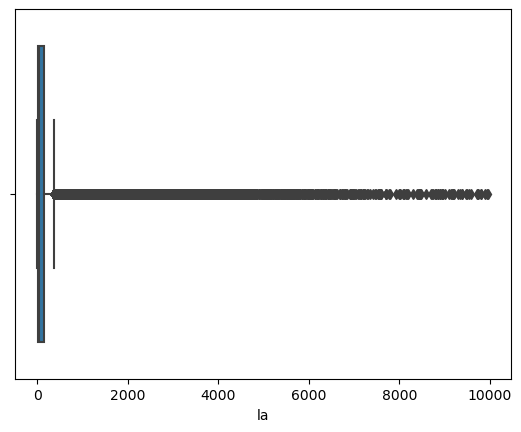

In [12]:

sns.boxplot(x = df["la"])


#### Generate the ld feature bloxplot.

<Axes: xlabel='ld'>

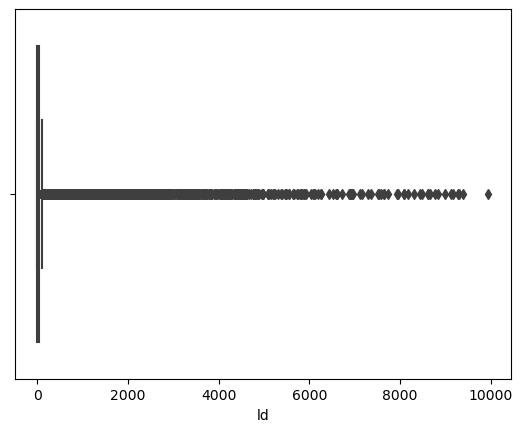

In [13]:

sns.boxplot(x = df["ld"])


#### Generate the nf feature bloxplot.

<Axes: xlabel='nf'>

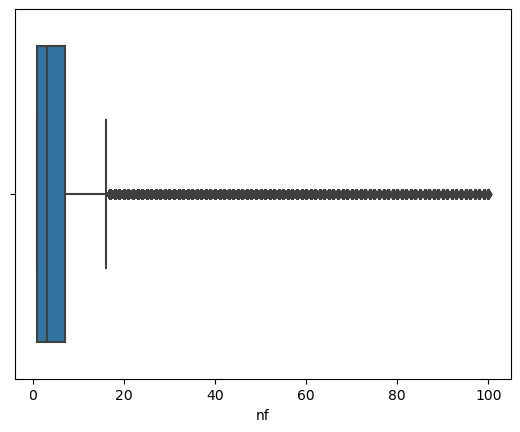

In [14]:

sns.boxplot(x = df["nf"])


#### Generate the nd feature bloxplot.

<Axes: xlabel='nd'>

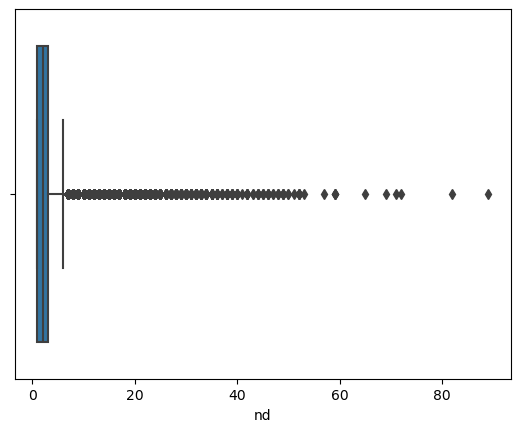

In [15]:

sns.boxplot(x = df["nd"])


#### Generate the ns feature bloxplot.

<Axes: xlabel='ns'>

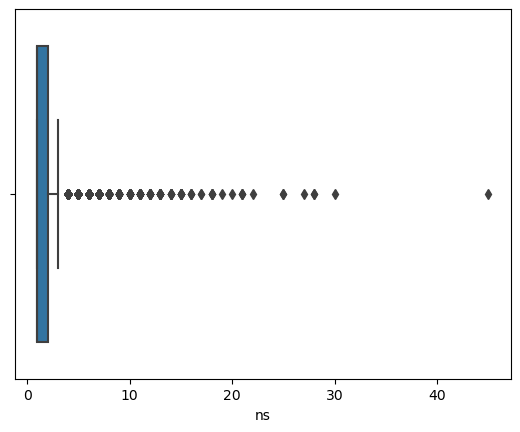

In [16]:

sns.boxplot(x = df["ns"])


#### Generate the ent feature bloxplot.

<Axes: xlabel='ent'>

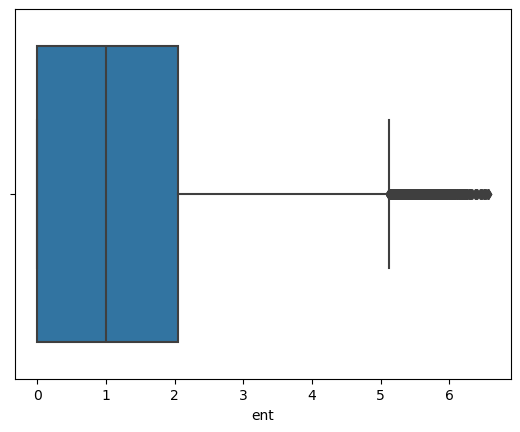

In [17]:

sns.boxplot(x = df["ent"])


#### Generate the ndev feature bloxplot.

<Axes: xlabel='ndev'>

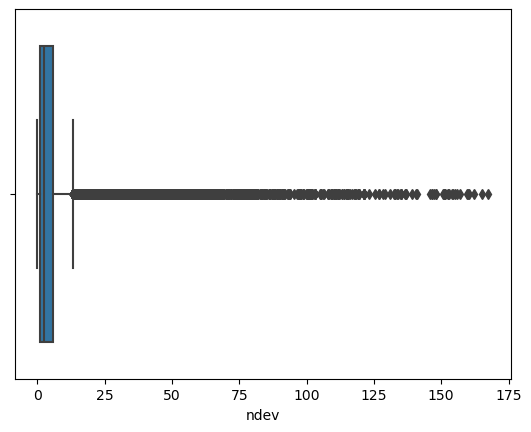

In [18]:

sns.boxplot(x = df["ndev"])


#### Generate the age feature bloxplot.

<Axes: xlabel='age'>

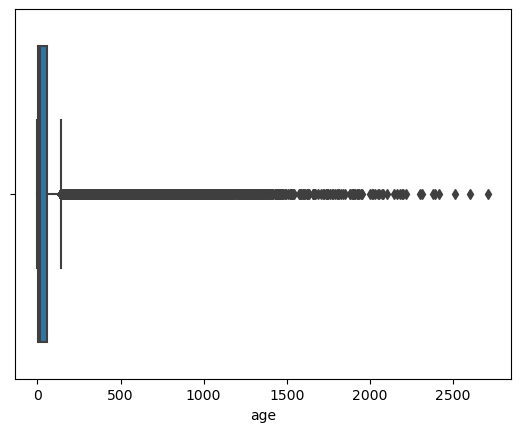

In [19]:

sns.boxplot(x = df["age"])


#### Generate the nuc feature bloxplot.

<Axes: xlabel='nuc'>

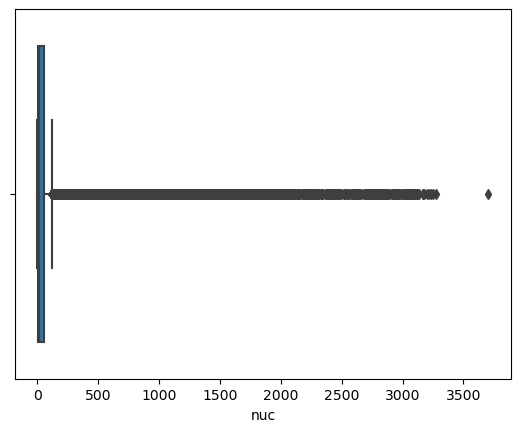

In [20]:

sns.boxplot(x = df["nuc"])


#### Generate the aexp feature bloxplot.

<Axes: xlabel='aexp'>

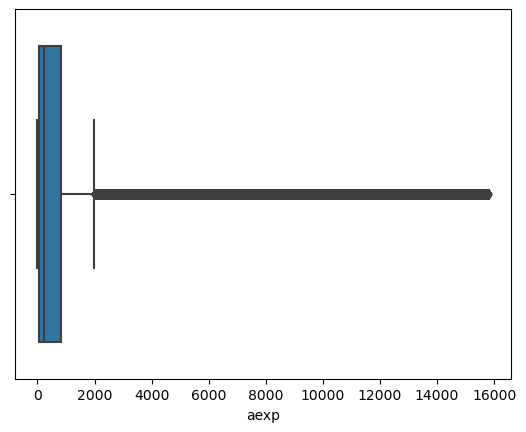

In [21]:

sns.boxplot(x = df["aexp"])


#### Generate the arexp feature bloxplot.

<Axes: xlabel='arexp'>

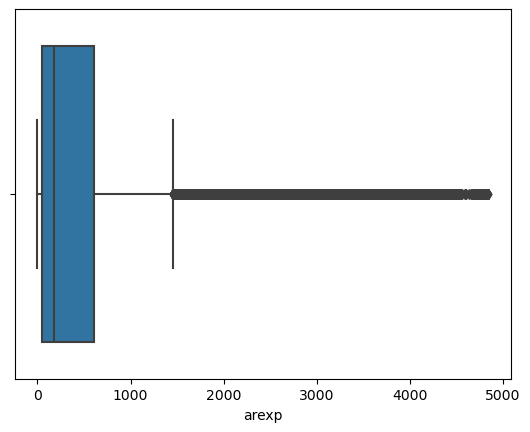

In [22]:

sns.boxplot(x = df["arexp"])


#### Generate the asexp feature bloxplot.

<Axes: xlabel='asexp'>

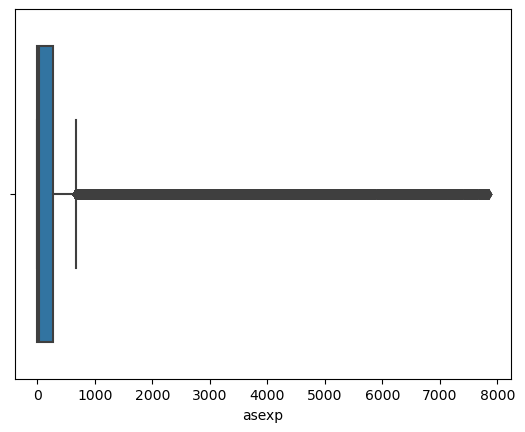

In [23]:

sns.boxplot(x = df["asexp"])


#### Check the balance of the dataset.

In [26]:

class_counts = df["buggy"].value_counts()
total_instances = class_counts.sum()
class_percentages = (class_counts / total_instances * 100).round(2)
class_info = pd.concat([class_counts, class_percentages], axis = 1)
class_info.columns = ["Frequence", "Percentage"]
class_info_sorted = class_info.sort_values(by = "Frequence", ascending = False)
print(class_info_sorted)


       Frequence  Percentage
buggy                       
0          78435      73.530
1          28239      26.470


#### Conclusions:
- There is no missing or inconsistent data.
- Features have values on different scales. This is an indication that it may be necessary to normalize or resize the values.
- The skewness analysis shows that all features have an asymmetric distribution. This is an indication that it may be necessary to use feature normalize techniques.
- The kurtosis analysis and the generated boxplots show that all features have outliers. This is an indication that it may be necessary to eliminate outliers from the dataset, if possible in this context, or use a Machine Learning model that can better deal with outliers if they were kept in the dataset.
- The analysis of the correlation between the features shows that there are features with a correlation greather than 70%. This is an indication that the option of removing these features from the dataset should be considered.
- The dataset is a little unbalanced. This is an indication that the use of balancing techniques should be considered.
